# Project 2

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile
import scipy.sparse.linalg

In [31]:
%matplotlib notebook

## Part 1: Gaussian quadrature

### 1.2 2D quadrature

In [71]:
#Define a cross-product function. Numpy has a slow one
def cross_product(p1, p2, p3):
    P = p1-p3
    Q = p2-p3
    cross = P[0]*Q[1]-P[1]*Q[0]
    absolute = abs(cross)
    return absolute

In [115]:
zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])
pq = np.ones(3)/3

def quadrature2D(p1,p2,p3, Nq, g):
    #J = np.absolute(np.cross(p1-p3,p2-p3)) #Endrer np.linalg.norm til np.absolute, siden vi får ut skalarer.
    J = cross_product(p1,p2,p3) #Raskere enn np.cross
    #coords = np.outer(zq[:,0],p1) + np.outer(zq[:,1],p2) + np.outer(zq[:,2],p3 )
    x = zq[:,0]*p1[0] + zq[:,1]*p2[0] + zq[:,2]*p3[0]
    y = zq[:,0]*p1[1] + zq[:,1]*p2[1] + zq[:,2]*p3[1]
    
    #I = J/2 * np.sum(pq * g(coords[:,0],coords[:,1]))
    I = J/2 * sum(pq * g(x,y))
    return I
"""
def quadrature2D(p1, p2, p3, Nq, g):
    # Function which performs quadrature in 2D
    # of function g over the triangle T with verticies
    # p1, p2, and p3 with Nq quadrature points where 
    # Nq = 1, 3, or 4
    
    # Jacobian of T
    J = cross_product(p1,p2,p3) #Modified
                    
    # Setting quadrature points and weights from table (barycentric coordinates)
    if Nq == 1:
        zq = np.ones(3)/3
        pq = 1
        coord = zq[0]*p1 + zq[1]*p2 + zq[2]*p3
        I = J/2 * pq * g(coord[0],coord[1])
    elif Nq == 3:
        zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])
        pq = np.ones(3)/3
    elif Nq == 4:
        zq = np.array([[1/3,1/3,1/3],[3/5,1/5,1/5],[1/5,3/5,1/5],[1/5,1/5,3/5]])
        pq = np.array([-9/16,25/48,25/48,25/48])
    else:
        print("Error: value of Nq is not allowed")
        
    # Calculating the coordinates in real-space and approx integral I
    if Nq != 1:
        coords = np.outer(zq[:,0],p1) + np.outer(zq[:,1],p2) + np.outer(zq[:,2],p3 )
        I = J/2 * sum(pq * g(coords[:,0],coords[:,1]))
    
    return I
"""

'\ndef quadrature2D(p1, p2, p3, Nq, g):\n    # Function which performs quadrature in 2D\n    # of function g over the triangle T with verticies\n    # p1, p2, and p3 with Nq quadrature points where \n    # Nq = 1, 3, or 4\n    \n    # Jacobian of T\n    J = cross_product(p1,p2,p3) #Modified\n                    \n    # Setting quadrature points and weights from table (barycentric coordinates)\n    if Nq == 1:\n        zq = np.ones(3)/3\n        pq = 1\n        coord = zq[0]*p1 + zq[1]*p2 + zq[2]*p3\n        I = J/2 * pq * g(coord[0],coord[1])\n    elif Nq == 3:\n        zq = np.array([[1/2,1/2,0],[1/2,0,1/2],[0,1/2,1/2]])\n        pq = np.ones(3)/3\n    elif Nq == 4:\n        zq = np.array([[1/3,1/3,1/3],[3/5,1/5,1/5],[1/5,3/5,1/5],[1/5,1/5,3/5]])\n        pq = np.array([-9/16,25/48,25/48,25/48])\n    else:\n        print("Error: value of Nq is not allowed")\n        \n    # Calculating the coordinates in real-space and approx integral I\n    if Nq != 1:\n        coords = np.outer(zq[:

<IPython.core.display.Javascript object>


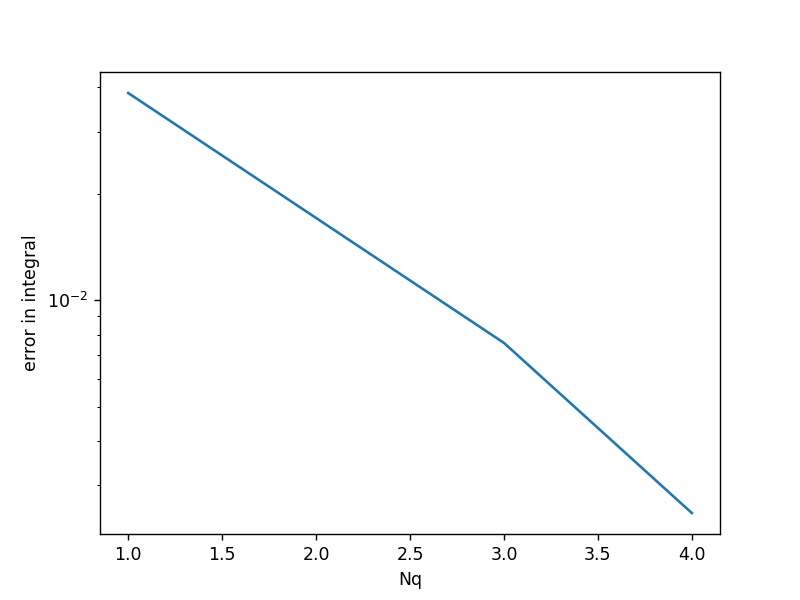

Text(0.5, 0, 'Nq')

In [34]:
test = lambda x,y: np.log(x+y)

Nqs = [1,3,4]
valueI = np.zeros(len(Nqs))
actualI = -3/2-32*np.log(2)/3+25*np.log(5)/4

for i in range(len(Nqs)):
    valueI[i] = quadrature2D(np.array([1,0]), np.array([3,1]), np.array([3,2]), Nqs[i], test)
    
error = np.abs(actualI - valueI)

fig, ax = plt.subplots()
ax.semilogy(Nqs,error)
ax.set_ylabel('error in integral')
ax.set_xlabel('Nq')
#plt.savefig('1_2.pdf')

## Part 2: Poisson in 2 dimensions

### 2.4 Implementation

In [35]:
from getdisc import GetDisc, NodalPoints, FreeBoundary, CircleData

<IPython.core.display.Javascript object>


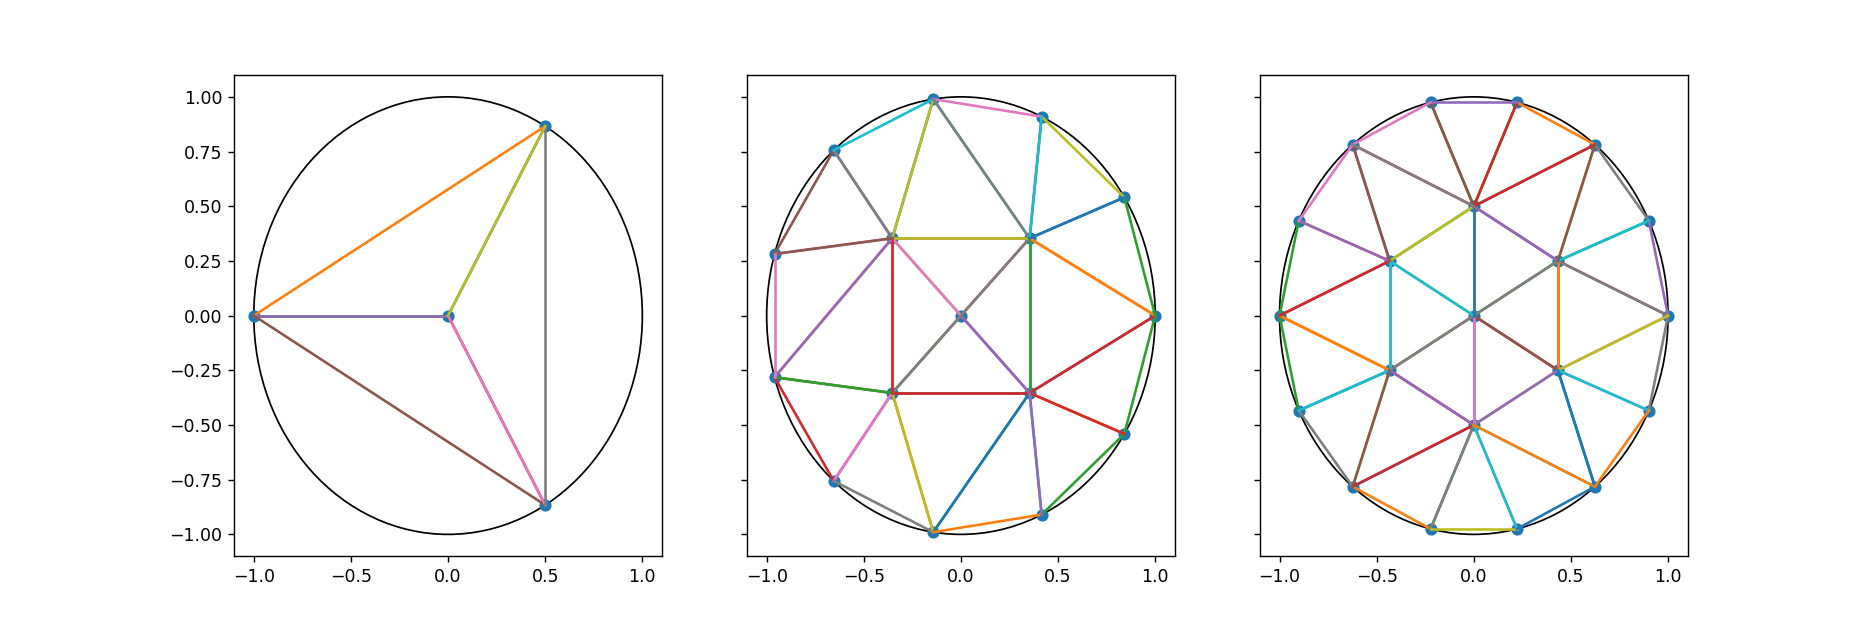

In [36]:
sizes = [4,16,21]

fig, ax = plt.subplots(1,3,sharey = True,figsize=(15, 5)) 

for i in range(len(sizes)):
    circle = plt.Circle((0, 0), 1, fill=False)
    ax[i].add_patch(circle)
    
    p,elements,edges = GetDisc(sizes[i])
    ax[i].scatter(p[:,0],p[:,1])
    
    # Plot of the lines in the triangulation
    for j in range(len(elements)):
        ax[i].plot([p[elements[j,0],0],p[elements[j,1],0]],[p[elements[j,0],1],p[elements[j,1],1]])
        ax[i].plot([p[elements[j,2],0],p[elements[j,1],0]],[p[elements[j,2],1],p[elements[j,1],1]])
        ax[i].plot([p[elements[j,0],0],p[elements[j,2],0]],[p[elements[j,0],1],p[elements[j,2],1]])
        
#plt.savefig('2_4.pdf')

### 2.5 Stiffness matrix

In [97]:
def StiffnessMatrix(N):
    # Function which creates the stiffness matrix
    # for a triangulation with N nodes

    # Get the triangulation
    p,tri,edge = GetDisc(N)
    
    A = np.zeros((N,N))
    
    # Loop over the elements to build A
    for tri in tri:
        area = 1/2 * cross_product(p[tri[0]], p[tri[1]], p[tri[2]])
        # Find coefficients of the basis functions in element k
        C = np.linalg.solve([[1,p[tri[0],0],p[tri[0],1]],
                             [1,p[tri[1],0],p[tri[1],1]],
                             [1,p[tri[2],0],p[tri[2],1]]],
                            np.identity(3))
        
        for alpha in range(3):
            i = tri[alpha]
            for beta in range(3):
                j = tri[beta]
                A[i,j] = A[i,j] + area * (C[1,alpha] * C[1,beta] + C[2,alpha] * C[2,beta])
    return A

In [98]:
for N in [10,100,1000]:
    A = StiffnessMatrix(N)
    print('Number of nodes: ' + str(N))
    print('Rank of matrix A: ' + str(np.linalg.matrix_rank(A)))
    print('')

Number of nodes: 10
Rank of matrix A: 9

Number of nodes: 100
Rank of matrix A: 99

Number of nodes: 1000
Rank of matrix A: 999



### 2.6 Right hand side

In [105]:
def LoadVector(N, f):
    # N is number of nodes in the triangulation
    # f is the right hand side
    
    p,tri,edge = GetDisc(N)
    
    #Solution storrage
    F = np.zeros(N)
    
    # Loop over all elements
    for tri in tri: 
        
        #Finds the coefficients of the basis functions for the current element
        C = np.linalg.solve([[1,p[tri[0],0],p[tri[0],1]],
                             [1,p[tri[1],0],p[tri[1],1]],
                             [1,p[tri[2],0],p[tri[2],1]]],
                            np.identity(3))
        # Loop over the corners of the current triangle
        for alpha in range(3):
            i = tri[alpha] #Lokal to global map
            
            #Makes the function inside the integral
            #def fH_ak(x,y):
            #    return 
                        
            #Fill inn the vector by solving the integral with quadrature.
            F[i] = F[i] + quadrature2D(p[tri[0]], p[tri[1]], p[tri[2]], 3, lambda x,y: f(x,y)*(C[0,alpha] + C[1,alpha]*x + C[2,alpha]*y))
    return F

In [87]:
#Right hand side in the model problem
f = lambda x,y: -8*np.pi*np.cos(2*math.pi*(x**2+y**2)) + 16*np.pi**2*(x**2 + y**2)*np.sin(2*np.pi*(x**2 + y**2))
#def f(x,y):
#    return -8*np.pi*np.cos(2*math.pi*(x**2+y**2)) + 16*np.pi**2*(x**2 + y**2)*np.sin(2*np.pi*(x**2 + y**2))

#Exact solution of the model problem
def u_ex(x,y):
    return np.sin(2*np.pi*(x**2 + y**2))

### 2.7 Boundary conditions

In [65]:
#We solve the system with boundary conditions directly

def Laplace2Dsolver(N, f):
    
    #Makes the matrix without considering the boundary
    Atilde =  StiffnessMatrix(N)
    
    #Makes the right hand side without considering the boundary
    Ftilde = LoadVector(N, f)
    
    p,tri,edge = GetDisc(N)
    
    #Define the size the reduced system will have, N - #boundary-nodes
    intN = N - np.size(edge,0)
    
    #Slice the matrix to impose the boundary
    A = Atilde[:intN, :intN]
    
    #Slice the F-vector to be correct size
    F = Ftilde[:intN]
    
    #Solve the system
    u = scipy.sparse.linalg.spsolve(A,F)
    
    return u

### 2.8 Verification

         3618676 function calls (3618665 primitive calls) in 16.804 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    5.036    5.036    5.036    5.036 {method 'nonzero' of 'numpy.ndarray' objects}
   117954    2.049    0.000    5.371    0.000 4205122781.py:4(quadrature2D)
   117954    1.799    0.000    1.799    0.000 3020759102.py:2(<lambda>)
        1    1.289    1.289    3.088    3.088 584185591.py:1(StiffnessMatrix)
   117954    0.875    0.000    2.674    0.000 4103914467.py:27(<lambda>)
    78636    0.677    0.000    2.105    0.000 linalg.py:314(solve)
        1    0.656    0.656    7.811    7.811 4103914467.py:1(LoadVector)
   157313    0.567    0.000    0.567    0.000 {built-in method numpy.array}
        3    0.533    0.178    0.534    0.178 getdisc.py:41(NodalPoints)
   157272    0.479    0.000    0.509    0.000 1328775599.py:2(cross_product)
        3    0.393    0.131    0.946    0.315 getdisc.py:20(Get

<IPython.core.display.Javascript object>


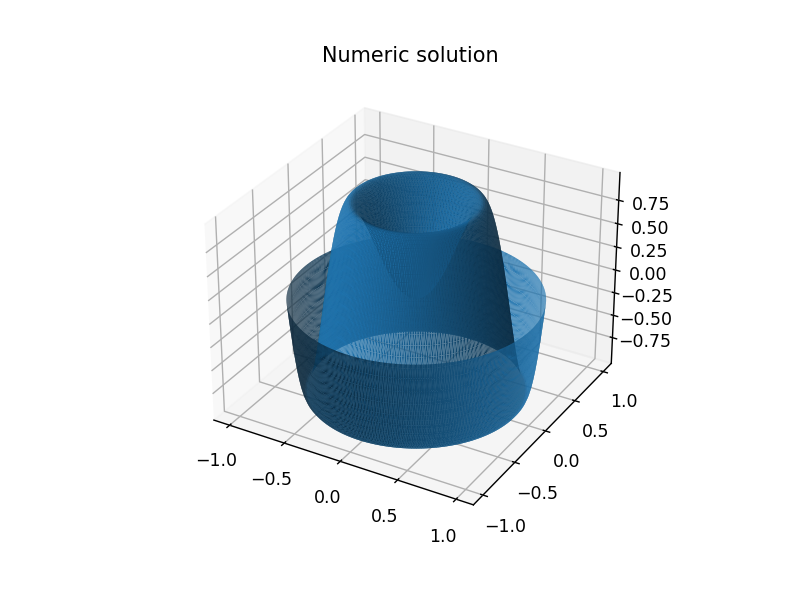

<IPython.core.display.Javascript object>


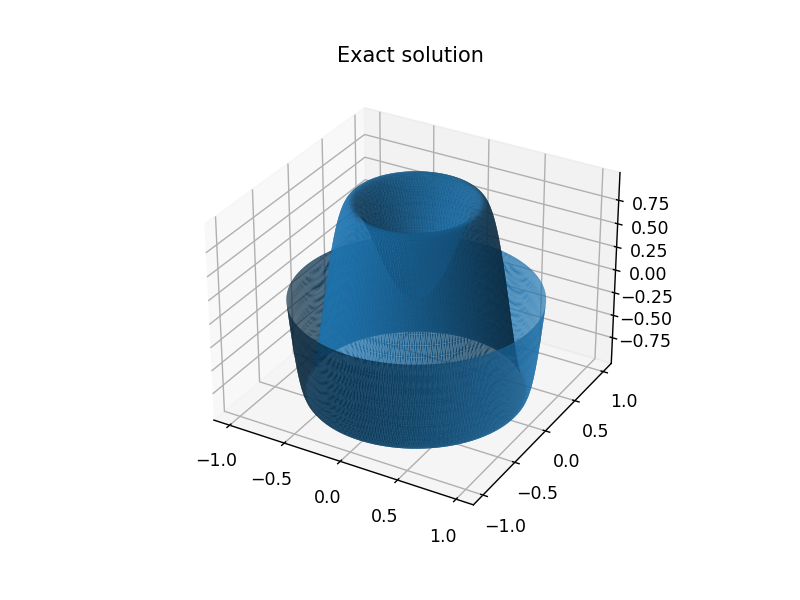

<IPython.core.display.Javascript object>


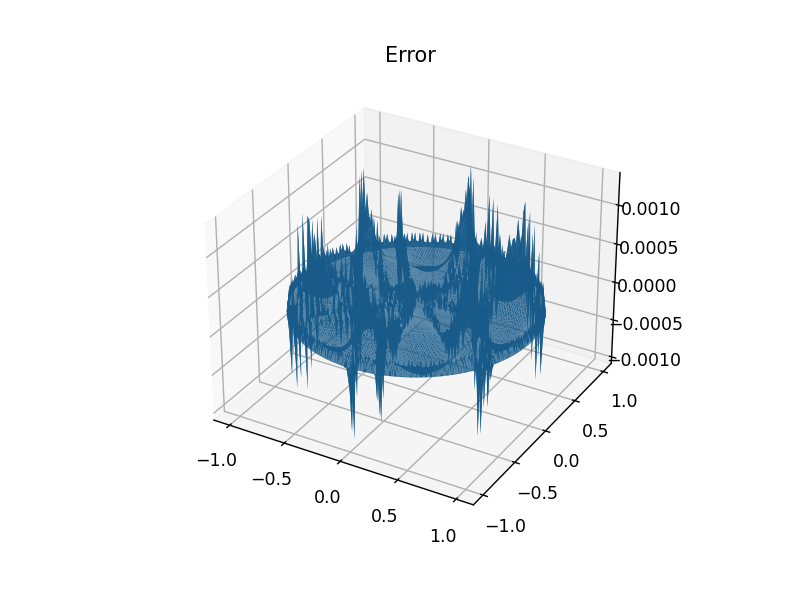

Text(0.5, 0.92, 'Error')

In [116]:
N = 20000

cProfile.run("Laplace2Dsolver(N, f)", sort="tottime")
p,tri,edge = GetDisc(N)
u = Laplace2Dsolver(N, f)
u_w_boundary = np.zeros(len(p))
u_w_boundary[:len(u)] = u
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_w_boundary)
ax.set_title('Numeric solution')
#fig.savefig('2_8_numeric.pdf')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1]))
ax.set_title('Exact solution')
#fig.savefig('2_8_exact.pdf')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1])-u_w_boundary)
ax.set_title('Error')
#fig.savefig('2_8_error.pdf')

In [ ]:
N = [11,51,1001,1501,3000, 4000, 5000,10000]

error = np.zeros(len(N))

for i in range(len(N)):
    p,tri,edge = GetDisc(N[i])
    u = Laplace2Dsolver(N[i], f)
    error[i] = np.max(np.abs(u-u_ex(p[:len(u),0],p[:len(u),1])))
error

fig, ax = plt.subplots()
ax.semilogy(N,error)
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.set_title('Max-Error')
#fig.savefig('2_8_maxerror.pdf')

<IPython.core.display.Javascript object>


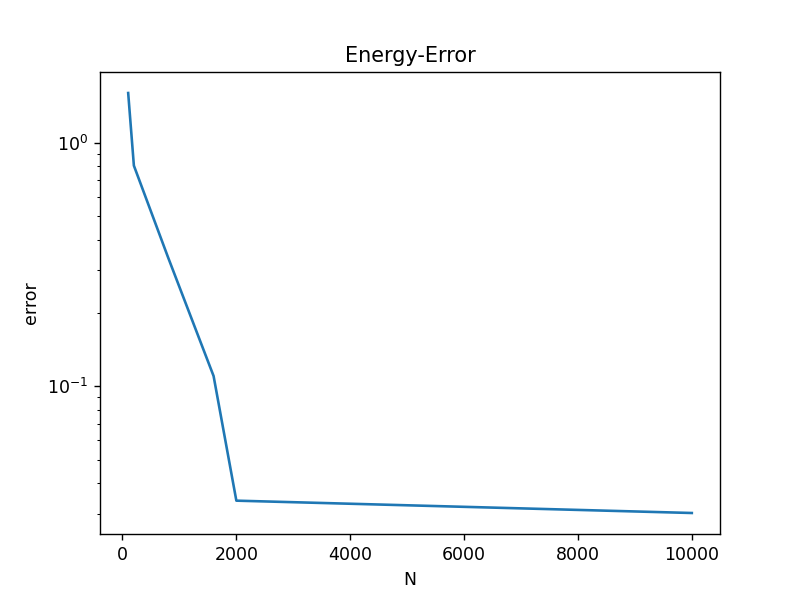

Text(0.5, 1.0, 'Energy-Error')

In [72]:
N = [100, 200, 800, 1600, 2000,10000]
error = np.zeros(len(N))

for i in range(len(N)):
    p,tri,edge = GetDisc(N[i])
    intN = N[i] - np.size(edge,0)
    
    u = Laplace2Dsolver(N[i], f)
    
    uExact = u_ex(p[:,[0]],p[:,[1]])

    uExact = uExact[:intN]
    
    e = np.zeros(intN)
    for j in range(len(uExact)):
        e[j] = (uExact[j] - u[j])
    
    Atilde = StiffnessMatrix(N[i])
    
    A = Atilde[:intN, :intN]
   
    error1 = np.linalg.solve(A,e)
    error2 = np.dot(e, error1)
    error[i] = error2
    
fig, ax = plt.subplots()
ax.semilogy(N,error)
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.set_title('Energy-Error')
#fig.savefig('2_8_energierror.pdf')

## Part 3: Neumann boundary conditions

###  3.3 Gauss quadrature

In [ ]:
def linequadrature2D(a,b,Nq,g):
    #Takes two points a and b in 2D, Nq which is the number of interpolation points, and a function g. 
    #Returns the straight-line integral from a to b of g. 
    
    #These quanteties are discribed in the report. 
    norm = (1/2)*np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    
    def x(t): 
        return (1/2)*((1-t)*a[0] + (t+1)*b[0])
    def y(t): 
        return (1/2)*((1-t)*a[1] + (t+1)*b[1])
    def f(t):
        return g(x(t), y(t))
    
    u = lambda t: f(t) 
    
    return norm*quadrature1D(-1, 1, Nq, u)

In [ ]:
#Check that we get the correct value for the function described in the project.

def test3(x):
    return np.exp(x)
def test2(u,v):
    return np.exp(u)

Nqs = [1,3,4]
valueI = np.zeros(len(Nqs))
actualI = quadrature1D(1,2,2,test3)

for i in range(len(Nqs)):
    valueI[i] = linequadrature2D(np.array([1,0]), np.array([2,0]), Nqs[i], test2)
    
error = np.abs(actualI - valueI)

fig, ax = plt.subplots()
ax.semilogy(Nqs,error)
ax.set_ylabel('error in integral')
ax.set_xlabel('Nq')

fig.savefig('3_3.pdf')

In [ ]:
def g(x,y):
    return 4*np.pi*np.sqrt(x**2+y**2)*np.cos(2*np.pi*(x**2+y**2)) 

In [ ]:
def LoadVectorNeumann(N, f, g):
    
    p,tri,edge = GetDisc(N)
    
    F = np.zeros(N)
    
    Nboundary = []
    for i in range(N):
        if i in edge[:,0] and p[i,1] >= 0:
            Nboundary.append(i) 
    
    for k in range(len(tri)):
        C = np.linalg.solve([[1,p[tri[k,0],0],p[tri[k,0],1]],
                             [1,p[tri[k,1],0],p[tri[k,1],1]],
                             [1,p[tri[k,2],0],p[tri[k,2],1]]],
                            np.identity(3))
        for alpha in range(3):
            i = tri[k, alpha]
            
            def H_ak(x,y):
                return C[0,alpha] + C[1,alpha]*x + C[2,alpha]*y
            def fH_ak(x,y):
                return f(x,y)*H_ak(x,y)  
            
            if i in Nboundary:
                nodes = []
                for j in range(3):
                    if tri[k,j] in Nboundary:
                        nodes.append(tri[k,j])
                if len(nodes) == 2:
                    def gH_ak(x,y):
                        return g(x,y)*H_ak(x,y)
                    nodes.sort()
                    F[i] = F[i] + linequadrature2D(p[nodes[0],:],p[nodes[1],:],4,gH_ak)
            
            
            h = lambda x,y: fH_ak(x,y)
            
            F[i] = F[i] + quadrature2D(p[tri[k,0]], p[tri[k,1]], p[tri[k,2]], 3, h)
    return F   

In [ ]:

def isNeumann(idx):
     return p[idx][1]>0 #here one can choose if >=0 or >0

In [ ]:
def Laplace2DsolverNeumann(N, f, g):
    Atilde =  StiffnessMatrix(N)
    Ftilde = LoadVectorNeumann(N, f, g)
    
    p,tri,edge = GetDisc(N)
    
    #Makes the matrix without considering the boundary
    Atilde =  StiffnessMatrix(N)
    
    #Makes the right hand side without considering the boundary
    Ftilde = LoadVector(N, f)
    
    p,tri,edge = GetDisc(N)
    
    #Define the size the reduced system will have, N - #boundary-nodes
    intN = N - np.size(edge,0)
    
    #Slice the matrix to impose the boundary
    A = Atilde[:intN, :intN]
    
    #Slice the F-vector to be correct size
    F = Ftilde[:intN]
    
    
    res = np.zeros(N)
    
    for e in edge:

        idx_1 = e[0]

        idx_2 = e[1]

        if isNeumann(idx_1) or isNeumann(idx_2):

            if isNeumann(idx_1):

                res[idx_1] += linequadrature2D(p[idx_1],p[idx_2],3,g)

            if isNeumann(idx_2):

                res[idx_2] += linequadrature2D(p[idx_1],p[idx_2],3,g)


    F = F + res[:intN]

    
    #Solve the system
    u = np.linalg.solve(A,F)
    
    return u

In [ ]:
N = 2001

p,tri,edge = GetDisc(N)
u = Laplace2DsolverNeumann(N, f, g)
u_w_boundary = np.zeros(len(p))
u_w_boundary[:len(u)] = u  
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot_trisurf(p[:len(u),0],p[:len(u),1],u)
ax.plot_trisurf(p[:,0],p[:,1],u_w_boundary)
ax.set_title('Numeric solution')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(p[:,0],p[:,1],u_ex(p[:,0],p[:,1])-u_w_boundary)
ax.set_title('Error')

fig.show()